###### Visualization is one of the important steps in exploring a data set

###### Topics to be covered in this Session: 
    o) Knowing your data
    i) An Overview of Basic Plot Types
    ii) Interactive Charts with Bokeh

In [41]:
import matplotlib.pyplot as plt    #pyplot is the sub-package of the master package matplotlib imported and referred as "plt"
# matplotlib is the master-package for visualisations in python
# Plot functions of "PANDAS" are built over(on top of) the methods in "MATPLOTLIB"
import seaborn as sns

In [42]:
import pandas as pd
import numpy as np
import os
import re

In [43]:
os.chdir(r"E:\2017\January\Data Handling Workshop (Python)\Visualization Session\Reference\DyDataSF2016Visualization-master")

In [44]:
#Importing your data
ip=pd.read_csv(r"Automobile price data.csv",index_col=False)

###### Understanding your data
#Some minimal no. of steps:
1. How many rows and columns in the data, what are the columns
2. An example view into the top 5 and bottom 5 rows in the dataset
3. Understand the data type of columns
4. How many columns have missing values and what is their count
5. Understanding the distribution of data in numerical columns
6. Understanding the type of data in categorical columns

In [45]:
#1. How many rows and columns in the data, what are the columns
print ip.shape
print ip.columns

(205, 26)
Index([u'symboling', u'normalized-losses', u'make', u'fuel-type',
       u'aspiration', u'num-of-doors', u'body-style', u'drive-wheels',
       u'engine-location', u'wheel-base', u'length', u'width', u'height',
       u'curb-weight', u'engine-type', u'num-of-cylinders', u'engine-size',
       u'fuel-system', u'bore', u'stroke', u'compression-ratio', u'horsepower',
       u'peak-rpm', u'city-mpg', u'highway-mpg', u'price'],
      dtype='object')


In [46]:
#2. An example view into the top 5 and bottom 5 rows in the dataset
ip.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
#3. Understand the data type of columns
List1=ip.dtypes.sort_values()
df=pd.DataFrame(List1,List1.index)
List2=[]
for each in List1.index:
    List2.append(ip.ix[3,each]) #index 3 seems to have no question mark as per above table view
df['Example_Value']=List2
df

,0,Example_Value
symboling,int64,2
city-mpg,int64,24
engine-size,int64,109
curb-weight,int64,2337
highway-mpg,int64,30
compression-ratio,float64,10
width,float64,66.2
length,float64,176.6
wheel-base,float64,99.8
height,float64,54.3


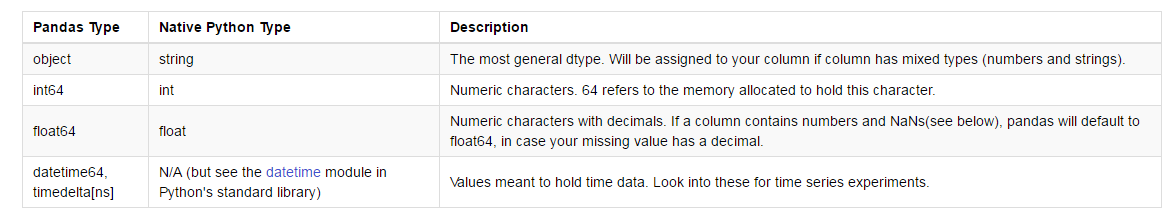

In [48]:
#int and float we understand, but what are objects?
from IPython.display import Image
Image(filename=r"E:\2017\January\Data Handling Workshop (Python)\Visualization Session\Pandas Data Types.PNG")

###### Conclusion #1: 
#There are numerical columns stored as strings  
- Action Item: The need is to change the columns with numbers to numeric data type

In [49]:
#seems like there are missing values represented as ?
#If you have checked for null values Before_Replacing_Q_Mark
List3=ip.isnull().sum()
for index1 in List3.index:
    for index2 in df.index:
        if index1==index2:
            df.ix[index2,'Missing_Values_before_replacing_?']=List3[index1]

In [50]:
ip.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [51]:
df
#If you have checked for null values Before_Replacing_Q_Mark, it seems like there is no null values

,0,Example_Value,Missing_Values_before_replacing_?
symboling,int64,2,0.0
city-mpg,int64,24,0.0
engine-size,int64,109,0.0
curb-weight,int64,2337,0.0
highway-mpg,int64,30,0.0
compression-ratio,float64,10,0.0
width,float64,66.2,0.0
length,float64,176.6,0.0
wheel-base,float64,99.8,0.0
height,float64,54.3,0.0


In [52]:
#Replacing ? with NULL values
for each in ip.columns:
    ip[each].replace(to_replace=r'?',value=np.nan,regex=False,inplace=True)

In [53]:
ip.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [54]:
List4=ip.isnull().sum()
for index3 in List4.index:
    for index4 in df.index:
        if index3==index4:
            df.ix[index4,'Missing_Values_after_replacing_?']=List4[index3]

In [55]:
df

,0,Example_Value,Missing_Values_before_replacing_?,Missing_Values_after_replacing_?
symboling,int64,2,0.0,0.0
city-mpg,int64,24,0.0,0.0
engine-size,int64,109,0.0,0.0
curb-weight,int64,2337,0.0,0.0
highway-mpg,int64,30,0.0,0.0
compression-ratio,float64,10,0.0,0.0
width,float64,66.2,0.0,0.0
length,float64,176.6,0.0,0.0
wheel-base,float64,99.8,0.0,0.0
height,float64,54.3,0.0,0.0


In [56]:
#All these columns where there are missing values, are of Object datatype because of the presence of ? mark symbol
df[df['Missing_Values_after_replacing_?']>0]

,0,Example_Value,Missing_Values_before_replacing_?,Missing_Values_after_replacing_?
num-of-doors,object,four,0.0,2.0
bore,object,3.19,0.0,4.0
stroke,object,3.40,0.0,4.0
horsepower,object,102,0.0,2.0
peak-rpm,object,5500,0.0,2.0
normalized-losses,object,164,0.0,41.0
price,object,13950,0.0,4.0


In [61]:
#Except for 'num-of-doors', all other columns are numerical, hence have to converted into numerical
numerical_columns=['bore','stroke','horsepower','peak-rpm','normalized-losses','price']
for each in numerical_columns:
    ip[each]=pd.to_numeric(ip[each])

In [62]:
List5=ip.dtypes.sort_values()

In [63]:
df['Changed_Dtype']=List5

In [60]:
df.sort_values(['Changed_Dtype'],ascending=True)

,0,Example_Value,Missing_Values_before_replacing_?,Missing_Values_after_replacing_?,Changed_Dtype
symboling,int64,2,0.0,0.0,int64
city-mpg,int64,24,0.0,0.0,int64
engine-size,int64,109,0.0,0.0,int64
curb-weight,int64,2337,0.0,0.0,int64
highway-mpg,int64,30,0.0,0.0,int64
normalized-losses,object,164,0.0,41.0,float64
peak-rpm,object,5500,0.0,2.0,float64
horsepower,object,102,0.0,2.0,float64
stroke,object,3.40,0.0,4.0,float64
bore,object,3.19,0.0,4.0,float64


In [64]:
ip.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [65]:
#One way is to replace the missing values
ip['normalized-losses'].fillna(value=ip['normalized-losses'].median(),inplace=True)

In [66]:
ip.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [67]:
#Another way is to remove the rows containing the missing values
ip.dropna(inplace=True)

In [68]:
ip.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [69]:
ip.describe()
#gives mean, median, std for all numerical columns
#5. Understanding the distribution of data in numerical columns

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,120.051813,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,32.425675,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,115.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [70]:
#6. Understanding the type of data in categorical columns
df['Column_Names']=df.index
df_new=pd.DataFrame()
df_new=df[['Column_Names','Changed_Dtype','Example_Value','Missing_Values_after_replacing_?']]
df_new.index=range(len(df_new))
df_new[df_new['Changed_Dtype']=='object']
List_Objects=df_new['Column_Names'][df_new['Changed_Dtype']=='object']
print "The categorical variable columns are:"
print List_Objects

The categorical variable columns are:
10        drive-wheels
11          body-style
12        num-of-doors
13          aspiration
14         engine-type
15    num-of-cylinders
16           fuel-type
17         fuel-system
20                make
24     engine-location
Name: Column_Names, dtype: object


In [71]:
ip.groupby('drive-wheels')['drive-wheels'].count()
for each in List_Objects:
    print ip.groupby(each)[each].count()
    print "The type of elements in %s categorical variable are %d" %(each,len(ip[each].unique()))
    print "-------------"

drive-wheels
4wd      8
fwd    114
rwd     71
Name: drive-wheels, dtype: int64
The type of elements in drive-wheels categorical variable are 3
-------------
body-style
convertible     6
hardtop         8
hatchback      63
sedan          92
wagon          24
Name: body-style, dtype: int64
The type of elements in body-style categorical variable are 5
-------------
num-of-doors
four    112
two      81
Name: num-of-doors, dtype: int64
The type of elements in num-of-doors categorical variable are 2
-------------
aspiration
std      158
turbo     35
Name: aspiration, dtype: int64
The type of elements in aspiration categorical variable are 2
-------------
engine-type
dohc     12
l        12
ohc     141
ohcf     15
ohcv     13
Name: engine-type, dtype: int64
The type of elements in engine-type categorical variable are 5
-------------
num-of-cylinders
eight       4
five       10
four      153
six        24
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
The type of elements in 

###### Overview of Basic chart types

In [ ]:
#import matplotlib.pyplot as plt
#pyplot is the sub-package of the master package matplotlib imported and referred as "plt"
# matplotlib is the master-package for visualisations in python
# Plot functions of "PANDAS" are built over(on top of) the methods in "MATPLOTLIB"

In [72]:
%matplotlib inline
#helps in printing the graphs inline, we need not use plt.show()

###### Scatter Plot via Matplotlib

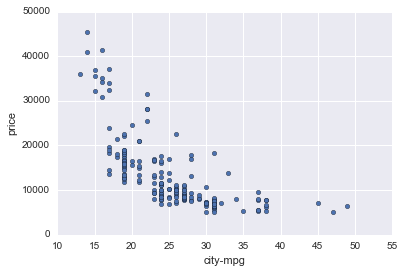

In [73]:
#Scattet plot of of two numerical data
ip.plot(kind = 'scatter', x = 'city-mpg', y = 'price')
#domain-specific note: miles per gallon is mpg
#Ironic, as per below graph, high priced cars give low mileage in cities

#Having __more control__ over the scatter plot

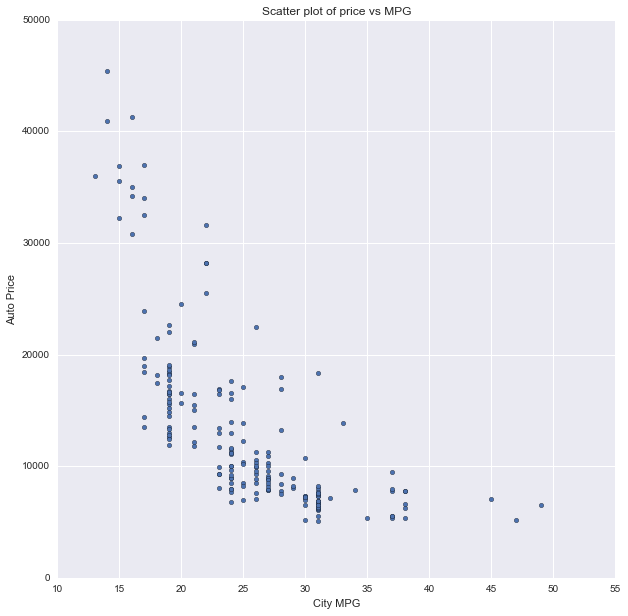

In [74]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
ip.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot of price vs MPG') # Give the plot a main title
ax.set_xlabel('City MPG') # Set text for the x axis
ax.set_ylabel('Auto Price')# Set text for y axis

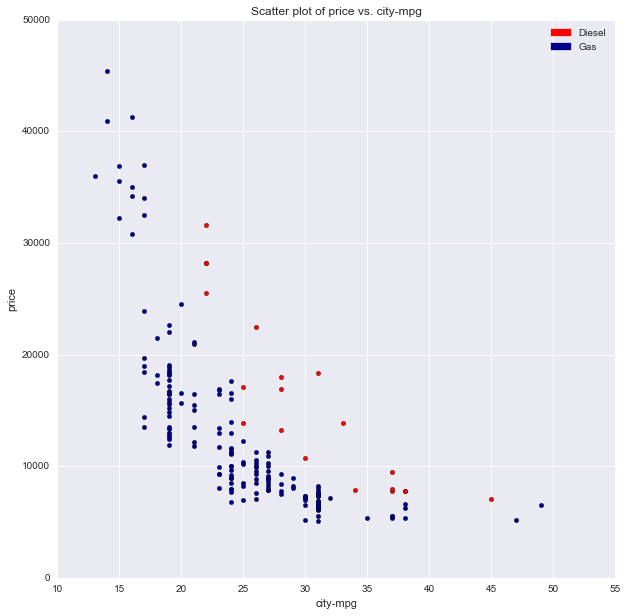

'Done'

In [75]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')
            plt.hold(True)#True is default option, no need to specifically mention otherwise.Hence the next plot will be over the same plot area
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red')
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()
    return 'Done'
auto_color(ip, ['city-mpg'])

Phew, That was tough!!!
seaborn reduces several lines of processing you might have to do if processing in matplotlib

In [76]:
Thumb Rule: If a lot of processing or color is needed, try Seaborn plots 

SyntaxError: invalid syntax (<ipython-input-76-784352d37217>, line 1)

#seaborn lm plot has __hue__ which helps avoid coding to bring to another dimension

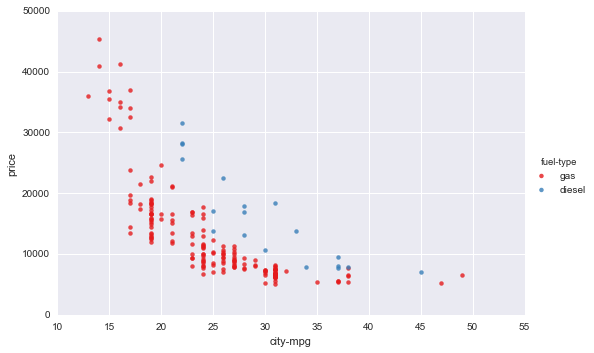

In [79]:
sns.lmplot(x = 'city-mpg', y = 'price', data = ip, hue = "fuel-type", palette="Set1", fit_reg = False,size=5,aspect=1.5)
#linear model plot
#source: http://seaborn.pydata.org/generated/seaborn.lmplot.html

__Seaborn is a high-level interface to Matplotlib__
Seaborn needs Matplotlib to customize things

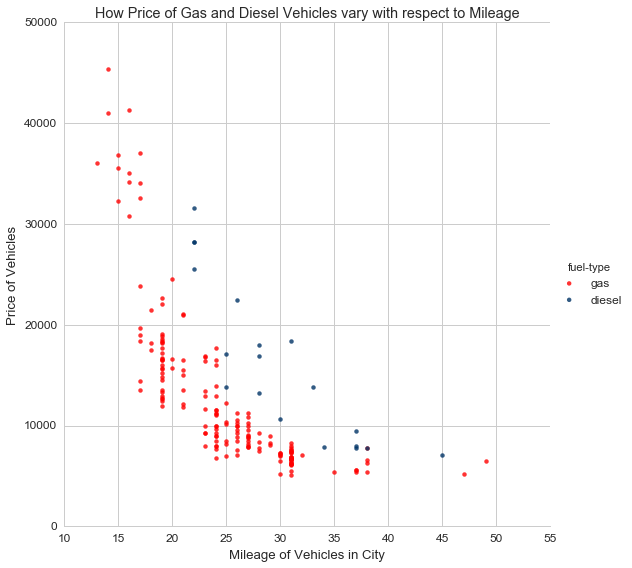

In [80]:
color_template=['#ff0000','#003366']
#Dark red - #ff0000
#Dark blue - #003366

plt.figure(figsize=(10,10)) 
sns.set_context("notebook", font_scale=1.2)
sns.set_style('whitegrid')

sns.lmplot(x = 'city-mpg', y = 'price', data = ip, hue = "fuel-type", palette=color_template, fit_reg = False,size=8,aspect=1)

plt.xlabel('Mileage of Vehicles in City') # Set text for the x axis
plt.ylabel('Price of Vehicles')# Set text for y axis

plt.title('How Price of Gas and Diesel Vehicles vary with respect to Mileage')
plt.show()

#Plotting the same graph with Matplotlib controls between City MPG and price with Fuel Type as legend
color_template=['#003366','#ff0000']

__plt.figure(figsize=(10,10))__
#the above function has no use for sns.lmplot because size and color cycle are controlled through function parameters


__sns.set_context("notebook", font_scale=1.2)__
#http://seaborn.pydata.org/generated/seaborn.set_context.html#seaborn.set_context


__sns.set_style('whitegrid')__
#other parameters include darkgrid, whitegrid, dark, white, ticks

__sns.lmplot(x = 'city-mpg', y = 'price', data = ip, hue = "fuel-type", palette=color_template, fit_reg = False,size=8,aspect=1)__

plt.xlabel('Mileage of Vehicles in City') # Set text for the x axis
plt.ylabel('Price of Vehicles')# Set text for y axis

plt.title('How Price of Gas and Diesel Vehicles vary with respect to Mileage')
plt.show()

#linear model plot
#source: http://seaborn.pydata.org/generated/seaborn.lmplot.html
#lmplot() needs to occupy an entire figure, and the size and color cycle are controlled through function parameters, 
#ignoring the global matplotlib defaults.

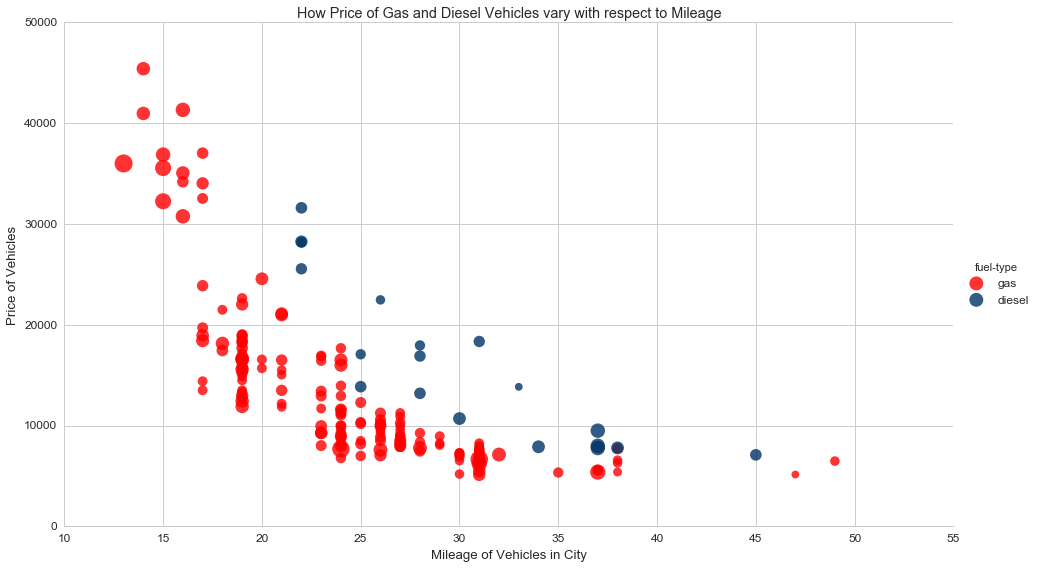

In [81]:
color_template=['#ff0000','#003366']

plt.figure(figsize=(10,10)) 
sns.set_context("notebook", font_scale=1.2)
sns.set_style('whitegrid')

kws=dict(s=ip['engine-size'])  #the new part of the line
sns.lmplot(x = 'city-mpg', y = 'price', data = ip, hue = "fuel-type", palette=color_template, fit_reg = False,size=8,aspect=1.7,scatter_kws=kws)

plt.xlabel('Mileage of Vehicles in City') # Set text for the x axis
plt.ylabel('Price of Vehicles')# Set text for y axis

plt.title('How Price of Gas and Diesel Vehicles vary with respect to Mileage')
plt.show()

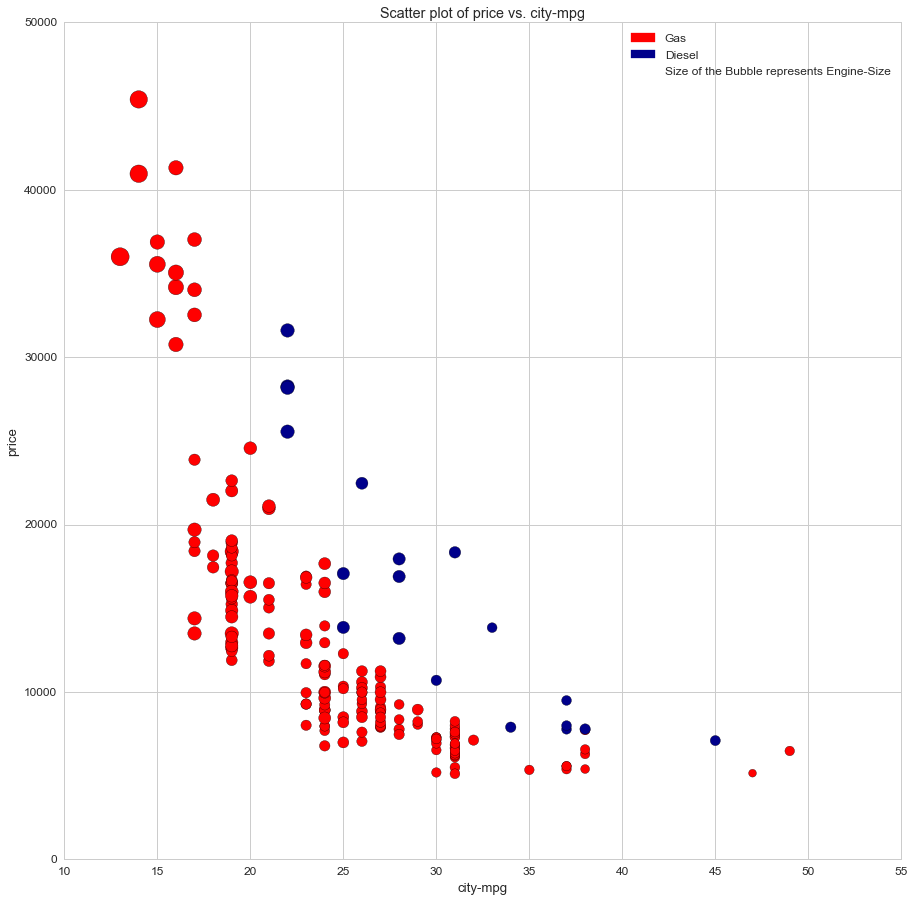

'Done'

In [82]:
#you can still create the above scatter plot with matplotlib/pandas plot (both are same)
#but we need to do computations and prep the data accordingly
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(15, 15))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red',s=temp1['engine-size'])
            plt.hold(True)#True is default option, no need to specifically mention otherwise.Hence the next plot will be over the same plot area
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue',s=temp2['engine-size'])
    ax.set_title('Scatter plot of price vs. ' + col)  
    red_patch = mpatches.Patch(color='Red', label='Gas')
    blue_patch = mpatches.Patch(color='DarkBlue', label='Diesel') 
    size_of_bubble=mpatches.Patch(color='none',label='Size of the Bubble represents Engine-Size')
    plt.legend(handles=[red_patch, blue_patch,size_of_bubble])
    plt.show()
    return 'Done'
auto_color(ip, ['city-mpg'])

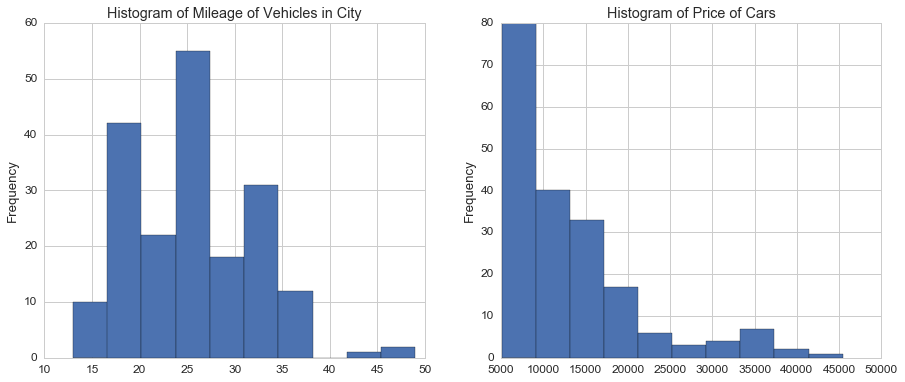

In [83]:
#Creation of sub plots concept
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
ip['city-mpg'].plot(kind='hist',ax=axes[0])
ip['price'].plot(kind='hist',ax=axes[1])
axes[0].set_title('Histogram of Mileage of Vehicles in City') # Give the plot a main title
axes[1].set_title('Histogram of Price of Cars') # Give the plot a main title

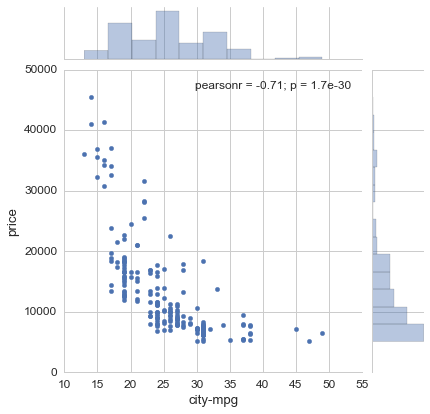

In [84]:
sns.jointplot(x='city-mpg', y='price', data=ip)
#Joint distribution plots combine information from scatter plots and histograms 
#to give you detailed information for bi-variate distributions

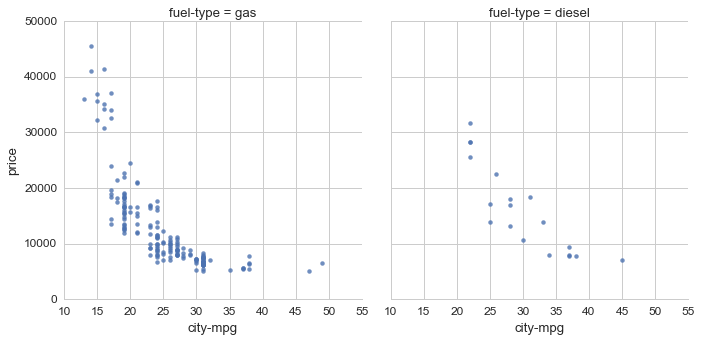

In [85]:
###### Price vs City-MPG for different Fuel-Types - in a different way
#Facetted plotting also know as conditioned plotting 
#A FacetGrid is defined for the data set. In this case we have only one facet (group by variable), across columns.
#The map method is applied to the facet grid with a plot type specified
g = sns.FacetGrid(ip, col="fuel-type",size=5,aspect=1)
#Subplot grid for plotting conditional relationships
g.map(sns.regplot,"city-mpg", "price", fit_reg = False)

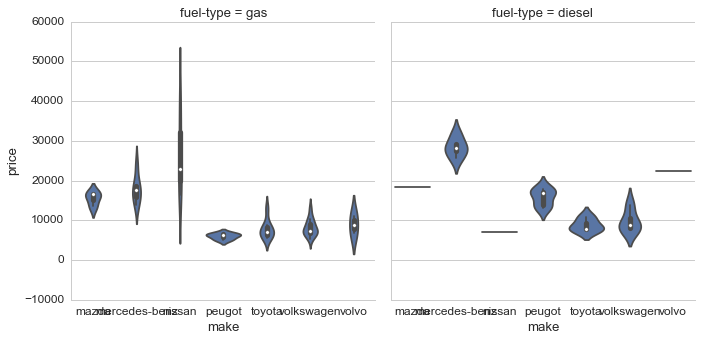

In [86]:
###### Price vs City-MPG for different Fuel-Types - in a different way

g = sns.FacetGrid(ip, col="fuel-type",size=5,aspect=1)
#Subplot grid for plotting conditional relationships
g.map(sns.violinplot,"make", "price")

#A violin plot combines attributes of boxplots and a kernel density estimation plot
#Violin plots are useful alternatives to box plots.
#They show the distribution (through the thickness of the violin) instead of only the summary statistics.

In [89]:
List_bar=ip.groupby('make')['make'].count().sort_values(ascending=False)

In [90]:
print List_bar.index
print List_bar[0]
Make_List=List_bar.index
List_bar.index=range(len(List_bar))

Index([u'toyota', u'nissan', u'mitsubishi', u'honda', u'subaru', u'mazda',
       u'volkswagen', u'volvo', u'peugot', u'mercedes-benz', u'bmw', u'dodge',
       u'plymouth', u'audi', u'saab', u'porsche', u'chevrolet', u'alfa-romero',
       u'jaguar', u'isuzu', u'mercury'],
      dtype='object', name=u'make')
32


In [91]:
df_bar=pd.DataFrame({'Make':Make_List,'Number_of_Cars_Sold':List_bar})

In [92]:
#Assignment:
#Creation of the following bar charts in Seaborn
ip.groupby('make')['make'].count().sort_values(ascending=False)

make
toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
volvo            11
peugot           11
mercedes-benz     8
bmw               8
dodge             8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

In [93]:
df_bar

,Make,Number_of_Cars_Sold
0,toyota,32
1,nissan,18
2,mitsubishi,13
3,honda,13
4,subaru,12
5,mazda,12
6,volkswagen,12
7,volvo,11
8,peugot,11
9,mercedes-benz,8


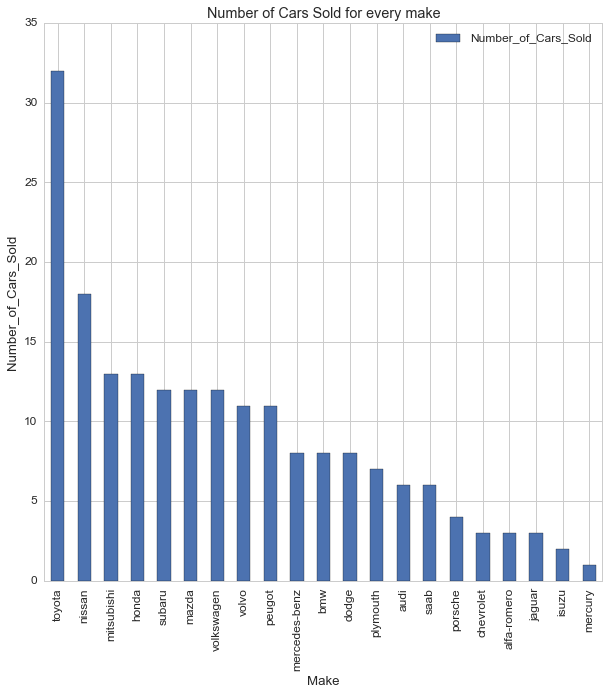

In [94]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
df_bar.plot(kind='bar',x = 'Make', y = 'Number_of_Cars_Sold', ax = ax)
ax.set_title('Number of Cars Sold for every make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number_of_Cars_Sold')# Set text for y axis

In [95]:
###### Add another dimension to this bar plot
#Creation of Subplots Concept

In [96]:
List_bar_price=ip.groupby('make')['price'].mean()
List_bar_price

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7790.125000
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda             9852.000000
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

In [97]:
for each in List_bar_price.index:
    for every in range(len(df_bar)):
        if each==df_bar.ix[every,'Make']:
            df_bar.ix[every,'Average_Price']=List_bar_price[each]

In [98]:
df_bar

,Make,Number_of_Cars_Sold,Average_Price
0,toyota,32,9885.812500
1,nissan,18,10415.666667
2,mitsubishi,13,9239.769231
3,honda,13,8184.692308
4,subaru,12,8541.250000
5,mazda,12,9852.000000
6,volkswagen,12,10077.500000
7,volvo,11,18063.181818
8,peugot,11,15489.090909
9,mercedes-benz,8,33647.000000


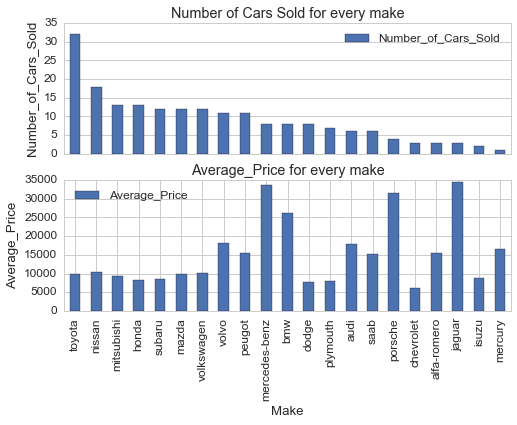

In [99]:
#fig = plt.figure(figsize=(15, 15)) # define plot area
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8,2))
plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=None)
df_bar.plot(kind='bar',x = 'Make', y = 'Number_of_Cars_Sold', ax = axes[0])
axes[0].get_xaxis().set_visible(False)
axes[0].set_title('Number of Cars Sold for every make') # Give the plot a main title
axes[0].xaxis.label.set_visible(False)
axes[0].set_ylabel('Number_of_Cars_Sold')# Set text for y axis

df_bar.plot(kind='bar',x = 'Make', y = 'Average_Price', ax = axes[1])
axes[1].set_title('Average_Price for every make') # Give the plot a main title
#axes[1].set_xlabel('Make') # Set text for the x axis
axes[1].set_ylabel('Average_Price')# Set text for y axis

In [100]:
###### Add another dimension to the original bar plot
#Creation of Secondary Axis Concept

#Source: http://matplotlib.org/examples/api/two_scales.html
The trick is to use *two different axes* that share the same *x* axis.
Such axes are generated by calling the `Axes.twinx` method.  Likewise,
`Axes.twiny` is available to generate axes that share a *y* axis but
have different top and bottom scales.

SyntaxError: invalid syntax (<ipython-input-100-5ac2b03c4aa0>, line 5)

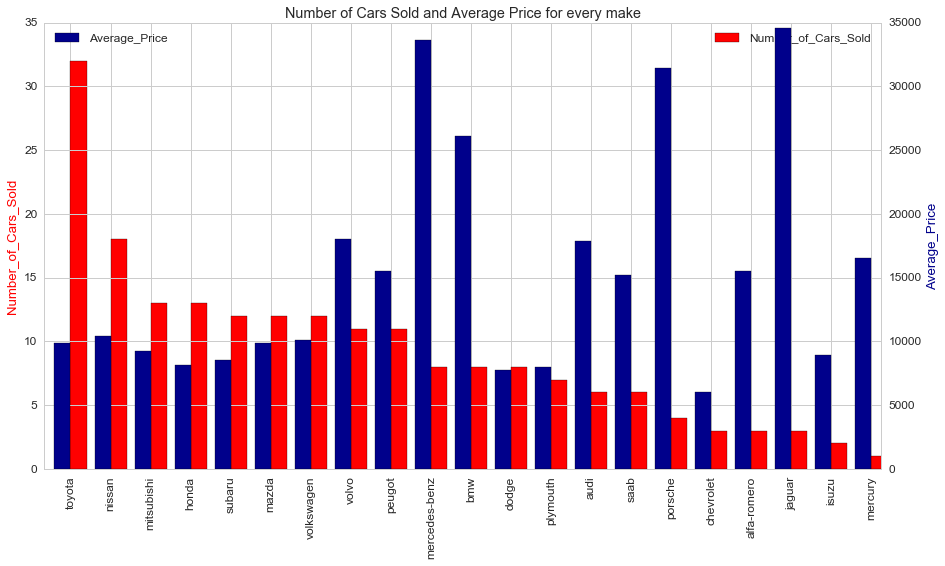

In [101]:
#fig = plt.figure(figsize=(15, 15)) # define plot area
fig, ax1 = plt.subplots(figsize=(15, 8))
width = 0.4
df_bar.plot(kind='bar',x = 'Make', y = 'Number_of_Cars_Sold', ax = ax1,color='Red',position=0,width=width)
ax1.set_title('Number of Cars Sold and Average Price for every make') # Give the plot a main title
ax1.xaxis.label.set_visible(False)
ax1.set_ylabel('Number_of_Cars_Sold',color='Red')# Set text for y axis
ax2=ax1.twinx()

df_bar.plot(kind='bar',x = 'Make', y = 'Average_Price', ax = ax2,color='DarkBlue',position=1,width=width)
#axes[1].set_xlabel('Make') # Set text for the x axis
ax2.set_ylabel('Average_Price',color='DarkBlue')# Set text for y axis
#Try another chart: http://matplotlib.org/examples/api/barchart_demo.html

###### Box Plot and Histogram Plot - for understanding the distribution of data
Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.

Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation.

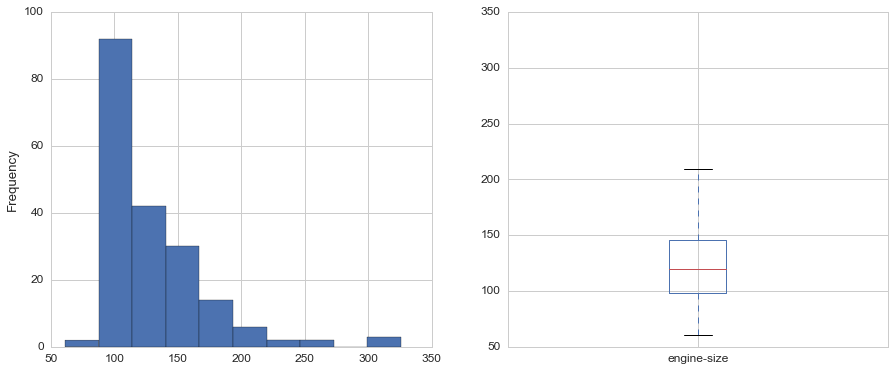

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
ip['engine-size'].plot(kind='hist',ax=axes[0])
ip['engine-size'].plot(kind='box',ax=axes[1])

Links to Read:
Matplotlib
https://github.com/Quantia-Analytics/DyDataSF2016Visualization/blob/master/LearningDataVisualization.ipynb
http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html#subplots

Seaborn Plots:
http://seaborn.pydata.org/tutorial/axis_grids.html
https://elitedatascience.com/python-seaborn-tutorial
http://catherineh.github.io/programming/2016/05/24/seaborn-pairgrid-tips
